In [121]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [122]:
# Load data
drive.mount("/content/gdrive")  
!pwd 
%cd "/content/gdrive/MyDrive/IA4DS/AprendizajeDeMaquina/FrameworkDeAprendizajeMaquina"
!ls 
df = pd.read_csv('data.csv') 
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/IA4DS/AprendizajeDeMaquina/FrameworkDeAprendizajeMaquina
/content/gdrive/MyDrive/IA4DS/AprendizajeDeMaquina/FrameworkDeAprendizajeMaquina
data.csv  sklearn_DecisionTreeRegressor.ipynb


,height,weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [123]:
# Get info of dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  10000 non-null  float64
 1   weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB
None


In [124]:
# Calculate duplicated values
print("Suma de duplicados: " + str(df.duplicated().sum()))

Suma de duplicados: 0


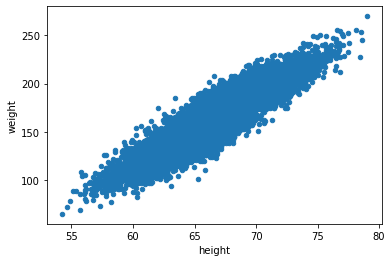

In [125]:
# Visualice data
df.plot(kind='scatter', x='height', y='weight')
plt.show()

In [126]:
# Assign x and y values
df_x=pd.DataFrame(df.height)
df_y=pd.DataFrame(df.weight)

In [127]:
# x values description
df_x.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [128]:
# Test train split for supervised training
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

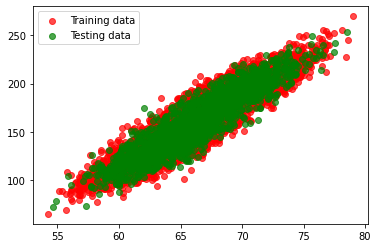

In [129]:
# Test train split visualization
plt.scatter(x_train, y_train, label='Training data', color='r', alpha=.7)
plt.scatter(x_test, y_test, label='Testing data', color='g', alpha=.7)
plt.legend()
plt.show()

In [130]:
# Create decision tree regressor model and train it
decTree=DecisionTreeRegressor()
decTree.fit(x_train,y_train)

DecisionTreeRegressor()

In [131]:
# Use model to predict on test data
prediction=decTree.predict(x_test)

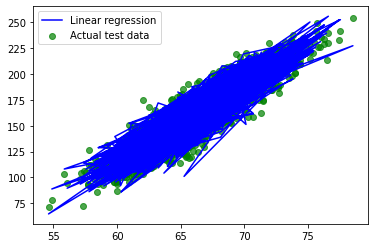

In [132]:
# Plot prediction line against actual test data
plt.plot(x_test, prediction, label='Linear regression', color='b')
plt.scatter(x_test, y_test, label='Actual test data', color='g', alpha=.7)
plt.legend()
plt.show()

In [133]:
# Test predictions 
prediction[1]

150.5599766

In [134]:
y_test

,weight
1603,181.325329
8713,155.414139
4561,168.695155
6600,135.780229
2558,198.045548
...,...
1944,171.350324
5978,137.284027
9809,104.872612
4014,204.779499


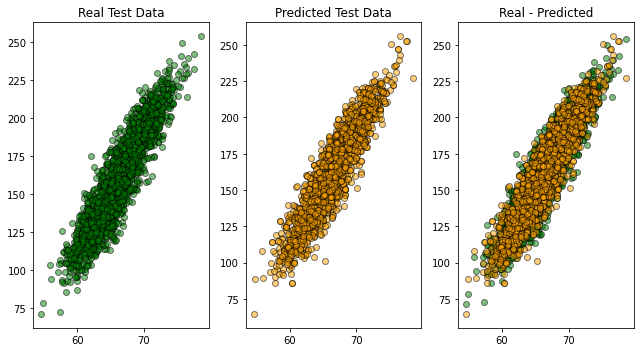

In [135]:
# Show real and predicted data 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))

axes[0].scatter(x_test, y_test, color='green', edgecolors='black', alpha=0.5)
axes[0].set_title("Real Test Data")

axes[1].scatter(x_test, prediction, color='orange', edgecolors='black', alpha=0.5)
axes[1].set_title("Predicted Test Data")

axes[2].scatter(x_test, y_test, color='green', edgecolors='black', alpha=0.5)
axes[2].scatter(x_test, prediction, color='orange', edgecolors='black', alpha=0.5)
axes[2].set_title("Real - Predicted")
fig.tight_layout()
plt.show()

In [136]:
# Calculate bias
data_true = 155.414139
data_predicted = prediction[1]
MBE = np.mean(data_predicted - data_true)
print("MBE: ", MBE)

MBE:  -4.854162400000007


In [137]:
# Calculate variance
import statistics
variance = statistics.variance(prediction) 
print(variance)

1022.7388896978894


In [138]:
# Score the model
decTree.score(x_test, y_test)

0.7192723072998692

In [139]:
decTree.score(x_train, y_train)

0.9994207071305006

In [140]:
scores = cross_val_score(decTree, x_train, y_train, cv=5, scoring='r2')
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Mean score of 0.72 with a standard deviation of 0.01


In [141]:
# Lasso model regularization
lasso_reg = Lasso(alpha=0.3)
lasso_reg.fit(x_train, y_train)


Lasso(alpha=0.3)

In [142]:
lasso_reg.score(x_test, y_test)

0.8513712187225047

In [143]:
lasso_reg.score(x_train, y_train)

0.8561149964826482

In [144]:
# Ridge model regularization
ridge_reg = Ridge(alpha=0.3)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.3)

In [145]:
ridge_reg.score(x_test, y_test)

0.8513619002560128

In [146]:
ridge_reg.score(x_train, y_train)

0.8561208934784967

In [147]:
# Lasso and ridge predictions
prediction_lasso=lasso_reg.predict(x_test)
prediction_ridge=ridge_reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


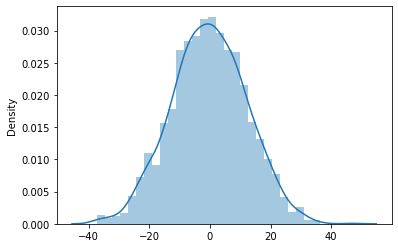

In [148]:
prediction_lasso=prediction_lasso.reshape(2000,1)
sns.distplot(y_test-prediction_lasso)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


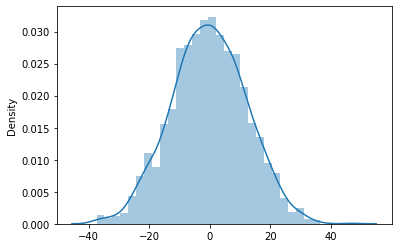

In [149]:
sns.distplot(y_test-prediction_ridge)